<a href="https://colab.research.google.com/github/AYALDAH/airtrafic/blob/main/notebooks/analyze_traffic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analyze traffic dataset ✈


In [79]:
!pip install --upgrade pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [144]:
!pip install mlforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.2/238.2 KB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 KB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.8/187.8 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 KB 9.0 MB/s eta 0:00:00
  Created wheel for fugue-sql-antlr: filename=fugue_sql_antlr-0.1.5-py3-none-any.whl size=157611 sha256=da5580ba865d48ff55bc8745b11c4afad6514d85b4b2f0b994cb30436e0bb195
  Stored in directory: /root/.cache/pip/wheels/61/d4/e5/7c90c375fba26867c6ec01bccb003b4cb983fe8386f2e0ffe0
Successfully built

In [80]:
import pandas as pd
from pandas_profiling import ProfileReport

In [81]:
traffic_df=pd.read_parquet('traffic_10lines.parquet')

In [82]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254899 entries, 3223247 to 10014282
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date                254899 non-null  datetime64[ns]
 1   pax                 254899 non-null  float64       
 2   seats               250749 non-null  float64       
 3   flight_type         251168 non-null  object        
 4   flight_typename     254899 non-null  object        
 5   home_airport        254899 non-null  object        
 6   paired_airport      254899 non-null  object        
 7   home_airportname    254899 non-null  object        
 8   paired_airportname  254899 non-null  object        
 9   distance            254899 non-null  Int64         
 10  flight_number       251438 non-null  object        
 11  airline_iata        248648 non-null  object        
 12  airline_name        254813 non-null  object        
 13  scheduled_datetime  2

In [83]:
traffic_df.describe(include='all').transpose()

<ipython-input-83-7d983b1c6b81>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.

<ipython-input-83-7d983b1c6b81>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count  unique                  top    freq  \
date                  254899    2626  2019-01-02 00:00:00     165   
pax                 254899.0     NaN                  NaN     NaN   
seats               250749.0     NaN                  NaN     NaN   
flight_type           251168      19                    J  240627   
flight_typename       254899       4            Scheduled  251250   
home_airport          254899       8                  LIS  125254   
paired_airport        254899      10                  OPO   72331   
home_airportname      254899       8               Lisbon  125254   
paired_airportname    254899      10                Porto   72331   
distance            254899.0     NaN                  NaN     NaN   
flight_number         251438    2663               TP 433    2332   
airline_iata          248648      90                   TP   91648   
airline_name          254813     131                  TAP   91648   
scheduled_datetime    254899  201668  2019-08-29 18:05:00       5   
direction             254899       2                    D  127622   
home_country          254899       7                   PT  125254   
paired_country        254899       8                   PT   72331   
home_countryname      254899       7             Portugal  125254   
paired_countryname    254899       8             Portugal   72331   
travel_area           254899       4             Domestic  108770   
aircraft_type         251439     168                 A320   30344   

                                 first                last        mean  \
date               2016-01-01 00:00:00 2023-03-10 00:00:00         NaN   
pax                                NaT                 NaT  127.082676   
seats                              NaT                 NaT  159.352879   
flight_type                        NaT                 NaT         NaN   
flight_typename                    NaT                 NaT         NaN   
home_airport                       NaT                 NaT         NaN   
paired_airport                     NaT                 NaT         NaN   
home_airportname                   NaT                 NaT         NaN   
paired_airportname                 NaT                 NaT         NaN   
distance                           NaT                 NaT  944.365078   
flight_number                      NaT                 NaT         NaN   
airline_iata                       NaT                 NaT         NaN   
airline_name                       NaT                 NaT         NaN   
scheduled_datetime 2016-01-01 06:10:00 2023-03-10 00:50:00         NaN   
direction                          NaT                 NaT         NaN   
home_country                       NaT                 NaT         NaN   
paired_country                     NaT                 NaT         NaN   
home_countryname                   NaT                 NaT         NaN   
paired_countryname                 NaT                 NaT         NaN   
travel_area                        NaT                 NaT         NaN   
aircraft_type                      NaT                 NaT         NaN   

                           std    min    25%     50%     75%      max  
date                       NaN    NaN    NaN     NaN     NaN      NaN  
pax                  53.050019  -11.0   88.0   140.0   168.0    582.0  
seats                47.311964    0.0  144.0   174.0   186.0    615.0  
flight_type                NaN    NaN    NaN     NaN     NaN      NaN  
flight_typename            NaN    NaN    NaN     NaN     NaN      NaN  
home_airport               NaN    NaN    NaN     NaN     NaN      NaN  
paired_airport             NaN    NaN    NaN     NaN     NaN      NaN  
home_airportname           NaN    NaN    NaN     NaN     NaN      NaN  
paired_airportname         NaN    NaN    NaN     NaN     NaN      NaN  
distance            886.540144  277.0  277.0  1109.0  1437.0  11653.0  
flight_number              NaN    NaN    NaN     NaN     NaN      NaN  
airline_iat

In [84]:
profile_report = ProfileReport(traffic_df)

In [85]:
profile_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [86]:
(traffic_df
.groupby(['home_airport','paired_airport','direction'])
.agg(date_min=('date','min'),date_max=('date','max'),pax=('pax','sum'))
.reset_index()
 )

home_airport paired_airport direction   date_min   date_max        pax
0           LGW            AMS         A 2016-01-01 2023-03-09  2686346.0
1           LGW            AMS         D 2016-01-01 2023-03-09  2686476.0
2           LGW            BCN         A 2016-01-01 2023-03-10  3813240.0
3           LGW            BCN         D 2016-01-01 2023-03-09  3799836.0
4           LIS            OPO         A 2016-01-01 2023-03-09  2819094.0
5           LIS            OPO         D 2016-01-01 2023-03-09  2813651.0
6           LIS            ORY         A 2016-01-01 2023-03-09  3835664.0
7           LIS            ORY         D 2016-01-01 2023-03-09  3860404.0
8           LYS            PIS         A 2017-11-20 2023-03-09     6173.0
9           LYS            PIS         D 2018-01-02 2023-03-09     4178.0
10          NTE            FUE         A 2019-01-06 2023-03-05    51406.0
11          NTE            FUE         D 2019-01-06 2023-03-05    48448.0
12          PNH            NGB         A 2017-01-11 2020-02-04     5674.0
13          PNH            NGB         D 2016-05-05 2023-03-07     4344.0
14          POP            JFK         A 2018-01-01 2023-03-09   244235.0
15          POP            JFK         D 2018-01-01 2023-03-09   248199.0
16          SCL            LHR         A 2019-01-01 2023-03-07    95959.0
17          SCL            LHR         D 2019-01-01 2023-03-07    97734.0
18          SSA            GRU         A 2019-01-01 2023-03-09  2609960.0
19          SSA            GRU         D 2019-01-01 2023-03-09  2662226.0

In [87]:
(traffic_df
.query('home_airport =="NTE"  and paired_airport =="FUE" and pax >=100')
['airline_name']
.value_counts()
)

Volotea                339
Smartwings             116
Transavia               90
Enter Air               77
ASL Airlines France      1
Name: airline_name, dtype: int64

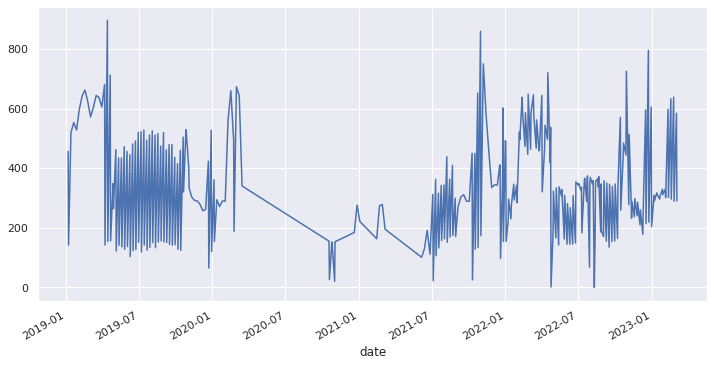

In [88]:
(traffic_df
 .query('home_airport == "NTE"  and paired_airport =="FUE"')
 .groupby(['home_airport','paired_airport','date'])
 .agg(pax_total=('pax','sum'))
 .reset_index()
 .set_index('date')
 ['pax_total']
 .plot(figsize=(12,6))
);

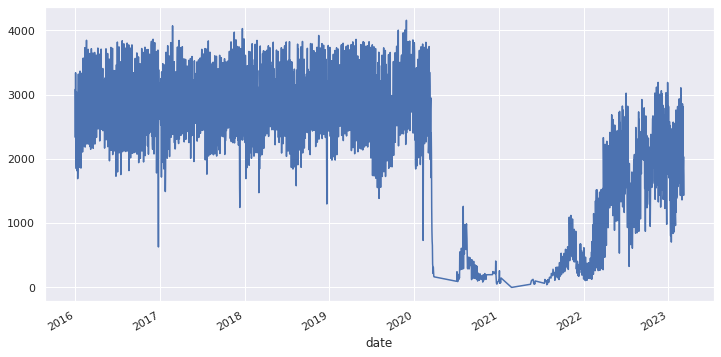

In [89]:
(traffic_df
 .query('home_airport == "LGW"  and paired_airport =="AMS"')
 .groupby(['home_airport','paired_airport','date'])
 .agg(pax_total=('pax','sum'))
 .reset_index()
 .set_index('date')
 ['pax_total']
 .plot(figsize=(12,6))
);

In [90]:
import seaborn as sns
sns.set()

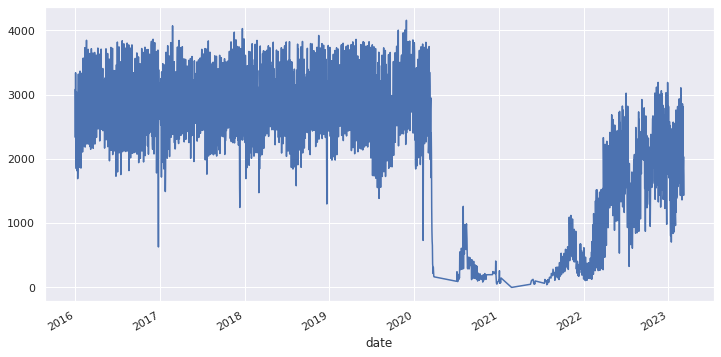

In [91]:
(traffic_df
 .query('home_airport == "LGW"  and paired_airport =="AMS"')
 .groupby(['home_airport','paired_airport','date'])
 .agg(pax_total=('pax','sum'))
 .reset_index()
 .set_index('date')
 ['pax_total']
 .plot(figsize=(12,6))
);

In [92]:
import datetime
import plotly

import pandas as pd

import plotly.offline as pyoff
import plotly.graph_objs as go

from plotly.subplots import make_subplots


def draw_ts_multiple(df: pd.DataFrame, v1: str, v2: str=None, prediction: str=None, date: str='date',
              secondary_y=True, covid_zone=False, display=True):
  """Draw times series possibly on two y axis, with COVID period option.

  Args:
  - df (pd.DataFrame): time series dataframe (one line per date, series in columns)
  - v1 (str | list[str]): name or list of names of the series to plot on the first x axis
  - v2 (str): name of the serie to plot on the second y axis (default: None)
  - prediction (str): name of v1 hat (prediction) displayed with a dotted line (default: None)
  - date (str): name of date column for time (default: 'date')
  - secondary_y (bool): use a secondary y axis if v2 is used (default: True)
  - covid_zone (bool): highlight COVID-19 period with a grayed rectangle (default: False)
  - display (bool): display figure otherwise just return the figure (default: True)

  Returns:
  - fig (plotly.graph_objs._figure.Figure): Plotly figure generated

  Notes:
  Make sure to use the semi-colon trick if you don't want to have the figure displayed twice.
  Or use `display=False`.
  """
  if isinstance(v1, str):
    variables = [(v1, 'V1')]
  else:
    variables = [(v, 'V1.{}'.format(i)) for i, v in enumerate(v1)]
  title = '<br>'.join([n + ': '+ v for v, n in variables]) + ('<br>V2: ' + v2) if v2 else '<br>'.join([v + ': '+ n for v, n in variables])
  layout = dict(
    title=title,
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
  )
  fig = make_subplots(specs=[[{"secondary_y": True}]])
  fig.update_layout(layout)
  for v, name in variables:
    fig.add_trace(go.Scatter(x=df[date], y=df[v], name=name), secondary_y=False)
  if v2:
    fig.add_trace(go.Scatter(x=df[date], y=df[v2], name='V2'), secondary_y=secondary_y)
    fig['layout']['yaxis2']['showgrid'] = False
    fig.update_yaxes(rangemode='tozero')
    fig.update_layout(margin=dict(t=125 + 30 * (len(variables) - 1)))
  if prediction:
    fig.add_trace(go.Scatter(x=df[date], y=df[prediction], name='^V1', line={'dash': 'dot'}), secondary_y=False)

  if covid_zone:
    fig.add_vrect(
        x0=pd.Timestamp("2020-03-01"), x1=pd.Timestamp("2022-01-01"),
        fillcolor="Gray", opacity=0.5,
        layer="below", line_width=0,
    )
  if display:
    pyoff.iplot(fig)
  return fig

In [93]:
draw_ts_multiple(
    (traffic_df
     .query('home_airport == "LGW" and paired_airport == "AMS"')
     .groupby(['home_airport', 'paired_airport', 'date'])
     .agg(pax_total=('pax', 'sum'))
     .reset_index()
    ),
    'pax_total',
    covid_zone=True,
)

In [94]:
nte_fue_df=(traffic_df
 .query('home_airport == "NTE"  and paired_airport =="FUE"')
 .groupby(['home_airport','paired_airport','date'])
 .agg(pax_total=('pax','sum'))
 .reset_index()
)
nte_fue_df


home_airport paired_airport       date  pax_total
0            NTE            FUE 2019-01-06      456.0
1            NTE            FUE 2019-01-07      142.0
2            NTE            FUE 2019-01-13      519.0
3            NTE            FUE 2019-01-20      553.0
4            NTE            FUE 2019-01-27      528.0
..           ...            ...        ...        ...
288          NTE            FUE 2023-02-19      296.0
289          NTE            FUE 2023-02-25      638.0
290          NTE            FUE 2023-02-26      289.0
291          NTE            FUE 2023-03-04      584.0
292          NTE            FUE 2023-03-05      290.0

[293 rows x 4 columns]

In [95]:
lgw_ams_df=(traffic_df
 .query('home_airport == "LGW"  and paired_airport =="AMS"')
 .groupby(['home_airport','paired_airport','date'])
 .agg(pax_total=('pax','sum'))
 .reset_index()
)
lgw_ams_df

home_airport paired_airport       date  pax_total
0             LGW            AMS 2016-01-01     3081.0
1             LGW            AMS 2016-01-02     2334.0
2             LGW            AMS 2016-01-03     3341.0
3             LGW            AMS 2016-01-04     2665.0
4             LGW            AMS 2016-01-05     1996.0
...           ...            ...        ...        ...
2243          LGW            AMS 2023-03-05     2815.0
2244          LGW            AMS 2023-03-06     1916.0
2245          LGW            AMS 2023-03-07     1741.0
2246          LGW            AMS 2023-03-08     1432.0
2247          LGW            AMS 2023-03-09     2029.0

[2248 rows x 4 columns]

First Model

In [96]:
def generate_route_df(traffic_df:pd.DataFrame,homeAirport:str, pairedAirport:str)-> pd.DataFrame:
  """Extract route dataframe from dataframe for route from home airport to paired airport
  Args:
  -traffic_df(pd.DataFrame):traffic dataframe
  -homeAirport(str):IATA Code for home airport
  -pairedAirport(str):IATA Code for paired airport 

  Returns:
  -pd.DataFrame: aggregated daily PAX traffic on routr (home-paired)"""
  _df=(traffic_df
       .query('home_airport=="{home}" and paired_airport=="{paired}"'.format(home=homeAirport,paired=pairedAirport))
       .groupby(['home_airport','paired_airport','date'])
       .agg(pax_total=('pax','sum'))
       .reset_index()
       )
  return _df

In [97]:
generate_route_df(traffic_df,"LGW","AMS")

home_airport paired_airport       date  pax_total
0             LGW            AMS 2016-01-01     3081.0
1             LGW            AMS 2016-01-02     2334.0
2             LGW            AMS 2016-01-03     3341.0
3             LGW            AMS 2016-01-04     2665.0
4             LGW            AMS 2016-01-05     1996.0
...           ...            ...        ...        ...
2243          LGW            AMS 2023-03-05     2815.0
2244          LGW            AMS 2023-03-06     1916.0
2245          LGW            AMS 2023-03-07     1741.0
2246          LGW            AMS 2023-03-08     1432.0
2247          LGW            AMS 2023-03-09     2029.0

[2248 rows x 4 columns]

In [98]:
from prophet import Prophet

In [99]:
baseline_model=Prophet()
baseline_model.fit(nte_fue_df.rename(columns={'date':'ds','pax_total':'y'}))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [100]:
baseline_model=Prophet()
baseline_model.fit(generate_route_df(traffic_df, "LGW","AMS").rename(columns={'date':'ds','pax_total':'y'}))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [101]:
baseline_model=Prophet()
baseline_model.fit(generate_route_df(traffic_df, "NTE","FUE").rename(columns={'date':'ds','pax_total':'y'}))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [102]:
future_df=baseline_model.make_future_dataframe(periods=15)# prepare to predict 15 days
future_df.tail(2)

ds
306 2023-03-19
307 2023-03-20

In [103]:
forecast_df=baseline_model.predict(future_df)

In [104]:
forecast_df

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2019-01-06  366.987264  335.753500  626.363844   366.987264   366.987264   
1   2019-01-07  366.754933   62.102224  367.352803   366.754933   366.754933   
2   2019-01-13  365.360946  284.931068  573.566967   365.360946   365.360946   
3   2019-01-20  363.734627  261.929562  564.413041   363.734627   363.734627   
4   2019-01-27  362.108309  311.742699  606.281249   362.108309   362.108309   
..         ...         ...         ...         ...          ...          ...   
303 2023-03-16  250.086252  -27.517072  268.848425   250.086252   250.086252   
304 2023-03-17  250.129075  272.099962  562.641144   250.129075   250.129075   
305 2023-03-18  250.171898  341.549130  642.452032   250.171877   250.171898   
306 2023-03-19  250.214721  365.576682  662.303754   250.212677   250.214721   
307 2023-03-20  250.257544  114.720783  413.067838   250.253773   250.258910   

     additive_terms  additive_terms_lower  additive_terms_upper      weekly  \
0        113.963365            113.963365            113.963365  136.806409   
1       -148.140453           -148.140453           -148.140453 -115.899406   
2         56.838713             56.838713             56.838713  136.806409   
3         49.792236             49.792236             49.792236  136.806409   
4        103.916880            103.916880            103.916880  136.806409   
..              ...                   ...                   ...         ...   
303     -132.497205           -132.497205           -132.497205 -256.348557   
304      168.375159            168.375159            168.375159   44.060402   
305      227.954512            227.954512            227.954512  103.260604   
306      261.821769            261.821769            261.821769  136.806409   
307        9.411225              9.411225              9.411225 -115.899406   

     weekly_lower  weekly_upper      yearly  yearly_lower  yearly_upper  \
0      136.806409    136.806409  -22.843043    -22.843043    -22.843043   
1     -115.899406   -115.899406  -32.241047    -32.241047    -32.241047   
2      136.806409    136.806409  -79.967696    -79.967696    -79.967696   
3      136.806409    136.806409  -87.014173    -87.014173    -87.014173   
4      136.806409    136.806409  -32.889528    -32.889528    -32.889528   
..            ...           ...         ...           ...           ...   
303   -256.348557   -256.348557  123.851352    123.851352    123.851352   
304     44.060402     44.060402  124.314757    124.314757    124.314757   
305    103.260604    103.260604  124.693908    124.693908    124.693908   
306    136.806409    136.806409  125.015360    125.015360    125.015360   
307   -115.899406   -115.899406  125.310631    125.310631    125.310631   

     multiplicative_terms  multiplicative_terms_lower  \
0                     0.0                         0.0   
1                     0.0                         0.0   
2                     0.0                         0.0   
3                     0.0                         0.0   
4                     0.0                         0.0   
..                    ...                         ...   
303                   0.0                         0.0   
304                   0.0                         0.0   
305                   0.0                         0.0   
306                   0.0                         0.0   
307                   0.0                         0.0   

     multiplicative_terms_upper        yhat  
0                           0.0  480.950629  
1                           0.0  218.614479  
2                           0.0  422.199658  
3                           0.0  413.526863  
4                           0.0  466.025189  
..                          ...         ...  
303                         0.0  117.589047  
304                         0.0  418.504234  
305                         0.0  478.126410  
306                         0.0  512.036491  
307       

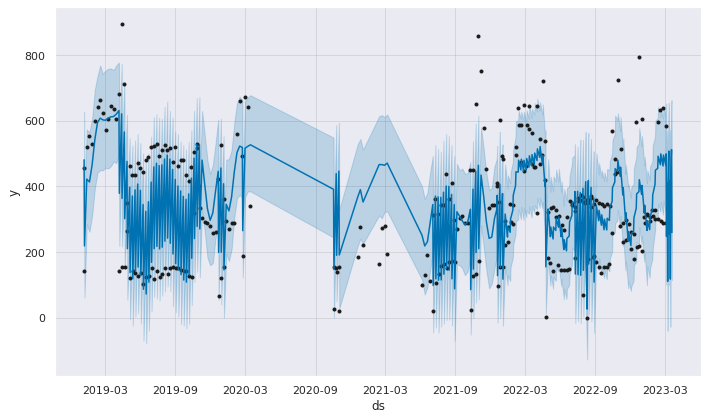

In [105]:
baseline_model.plot(forecast_df);

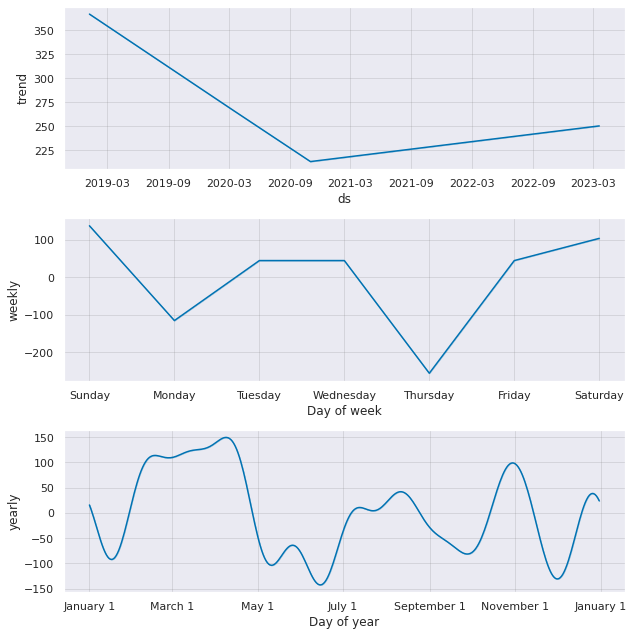

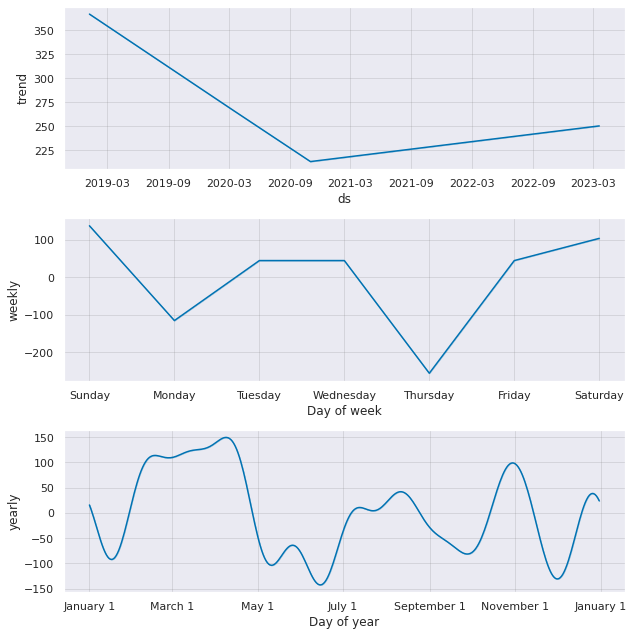

In [106]:
baseline_model.plot_components(forecast_df)

In [107]:
nte_fue_df.query('date<="2019-01-07"')

home_airport paired_airport       date  pax_total
0          NTE            FUE 2019-01-06      456.0
1          NTE            FUE 2019-01-07      142.0

In [108]:
generate_route_df(traffic_df,"NTE","FUE").date.max()

Timestamp('2023-03-05 00:00:00')

Evaluate performance PROPHET(RMSE ou MAPE)

In [109]:
from prophet.diagnostics import cross_validation

In [111]:
eval_df=cross_validation(baseline_model,period='90 days', horizon='90 days')

INFO:prophet:Making 10 forecasts with cutoffs between 2020-09-16 00:00:00 and 2022-12-05 00:00:00


  0%|          | 0/10 [00:00<?, ?it/s]

In [112]:
eval_df

ds        yhat  yhat_lower  yhat_upper      y     cutoff
0   2020-10-18  447.472952  352.299038  546.695840  155.0 2020-09-16
1   2020-10-19  124.280990   39.119411  220.634386   26.0 2020-09-16
2   2020-10-25  488.585274  397.789834  583.911028  152.0 2020-09-16
3   2020-10-26  153.801841   59.879730  247.025831  139.0 2020-09-16
4   2020-11-01  439.584883  348.701066  531.496392   20.0 2020-09-16
..         ...         ...         ...         ...    ...        ...
189 2023-02-19  562.993455  427.572343  701.851719  296.0 2022-12-05
190 2023-02-25  465.255019  323.821972  598.369375  638.0 2022-12-05
191 2023-02-26  553.509927  418.516842  686.913689  289.0 2022-12-05
192 2023-03-04  465.385062  327.778113  602.818998  584.0 2022-12-05
193 2023-03-05  555.602132  412.095751  688.251877  290.0 2022-12-05

[194 rows x 6 columns]

In [113]:
from prophet.diagnostics import performance_metrics

In [114]:
performance_metrics(eval_df)

INFO:prophet:Skipping MAPE because y close to 0


horizon           mse        rmse         mae     mdape     smape  coverage
0  10 days   7964.572025   89.244451   72.291339  0.209460  0.282279  0.684211
1  11 days   9346.762087   96.678654   78.280908  0.227023  0.317436  0.657895
2  12 days  12625.430698  112.362942   86.326633  0.209460  0.325730  0.684211
3  13 days  13687.832616  116.995011   90.400662  0.229651  0.334530  0.657895
4  14 days  12874.968302  113.467918   85.317102  0.192882  0.318882  0.684211
..     ...           ...         ...         ...       ...       ...       ...
76 86 days  35044.098263  187.200690  154.016154  0.566636  0.616390  0.403509
77 87 days  31087.535293  176.316577  150.802874  0.497562  0.555897  0.368421
78 88 days  28591.350991  169.089772  142.621852  0.445899  0.528505  0.368421
79 89 days  24919.942869  157.860517  131.487817  0.388496  0.490253  0.473684
80 90 days  27910.967928  167.065759  140.636592  0.497562  0.575879  0.421053

[81 rows x 7 columns]

In [115]:
from prophet.plot import plot_cross_validation_metric

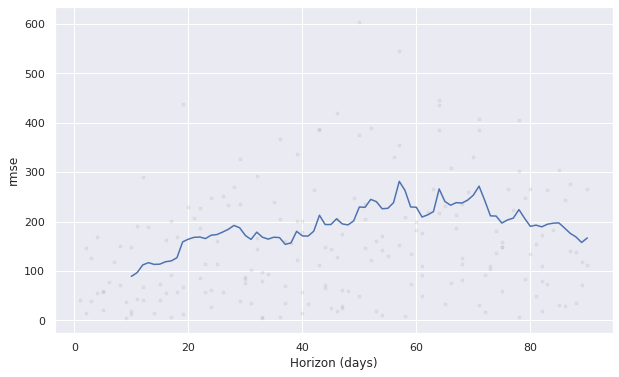

In [116]:
plot_cross_validation_metric(eval_df,metric='rmse');

## Automatisation du model et avaluation

In [117]:
routes=(traffic_df
.drop_duplicates(subset=['home_airport','paired_airport'])
[['home_airport','paired_airport']]
.to_dict(orient='rows')
)

<ipython-input-117-bceafab04b5a>:1: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.



In [118]:
import logging
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)
#logging.getLogger('prophet').setLevel(logging.WARNING)

In [119]:
routes

[{'home_airport': 'LGW', 'paired_airport': 'BCN'},
 {'home_airport': 'LGW', 'paired_airport': 'AMS'},
 {'home_airport': 'LIS', 'paired_airport': 'ORY'},
 {'home_airport': 'LIS', 'paired_airport': 'OPO'},
 {'home_airport': 'SSA', 'paired_airport': 'GRU'},
 {'home_airport': 'NTE', 'paired_airport': 'FUE'},
 {'home_airport': 'LYS', 'paired_airport': 'PIS'},
 {'home_airport': 'PNH', 'paired_airport': 'NGB'},
 {'home_airport': 'POP', 'paired_airport': 'JFK'},
 {'home_airport': 'SCL', 'paired_airport': 'LHR'}]

In [150]:
from asyncio import run_coroutine_threadsafe
models=dict()
performances=dict()

for route in routes:
  print(route)
  home=route['home_airport']
  paired=route['paired_airport']
  #print(home, paired

  #Build route traffic dataframe
  _df=generate_route_df(traffic_df,home, paired)

  #create a model
  _model=Prophet()

  #fit & evaluate the model
  _model.fit(_df.rename(columns={'date':'ds','pax_total':'y'}))

  #Cross validation the model
  _cv_df=cross_validation(_model,horizon='90 days',parallel="processes")
  _perf_df=performance_metrics(_cv_df,rolling_window=1)

  #Save the model to a dictionary
  models[(route['home_airport'], route['paired_airport'])]=_model
  performances[(route['home_airport'],route['paired_airport'])]=_perf_df['rmse'].values[0]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'LGW', 'paired_airport': 'BCN'}


INFO:prophet:Making 49 forecasts with cutoffs between 2017-01-10 00:00:00 and 2022-12-10 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f356ea712b0>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'LGW', 'paired_airport': 'AMS'}


INFO:prophet:Making 49 forecasts with cutoffs between 2017-01-09 00:00:00 and 2022-12-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f3582666af0>
INFO:prophet:Skipping MAPE because y close to 0
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'LIS', 'paired_airport': 'ORY'}


INFO:prophet:Making 49 forecasts with cutoffs between 2017-01-09 00:00:00 and 2022-12-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f3582545fd0>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'LIS', 'paired_airport': 'OPO'}


INFO:prophet:Making 49 forecasts with cutoffs between 2017-01-09 00:00:00 and 2022-12-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f356f5e3520>
INFO:prophet:Skipping MAPE because y close to 0
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'SSA', 'paired_airport': 'GRU'}


INFO:prophet:Making 24 forecasts with cutoffs between 2020-02-08 00:00:00 and 2022-12-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f35700b8e50>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 20 forecasts with cutoffs between 2020-08-02 00:00:00 and 2022-12-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f356eca6370>


{'home_airport': 'NTE', 'paired_airport': 'FUE'}


INFO:prophet:Skipping MAPE because y close to 0
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 26 forecasts with cutoffs between 2018-11-24 00:00:00 and 2022-12-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f35700b8730>


{'home_airport': 'LYS', 'paired_airport': 'PIS'}


INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
INFO:prophet:n_changepoints greater than number of observations. Using 17.
INFO:prophet:n_changepoints greater than number of observations. Using 17.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
INFO:prophet:n_changepoints g

{'home_airport': 'PNH', 'paired_airport': 'NGB'}


INFO:prophet:Making 11 forecasts with cutoffs between 2017-10-02 00:00:00 and 2022-12-07 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f356ec62160>
INFO:prophet:n_changepoints greater than number of observations. Using 0.
INFO:prophet:n_changepoints greater than number of observations. Using 0.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'POP', 'paired_airport': 'JFK'}


INFO:prophet:Making 32 forecasts with cutoffs between 2019-02-13 00:00:00 and 2022-12-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f356ec47ee0>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 13 forecasts with cutoffs between 2020-01-04 00:00:00 and 2022-12-07 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f356ec4cd30>


{'home_airport': 'SCL', 'paired_airport': 'LHR'}


In [151]:
models

{('LGW', 'BCN'): <prophet.forecaster.Prophet at 0x7f356ea9d700>,
 ('LGW', 'AMS'): <prophet.forecaster.Prophet at 0x7f358bfa97f0>,
 ('LIS', 'ORY'): <prophet.forecaster.Prophet at 0x7f35824eb370>,
 ('LIS', 'OPO'): <prophet.forecaster.Prophet at 0x7f356ea9d160>,
 ('SSA', 'GRU'): <prophet.forecaster.Prophet at 0x7f3582568730>,
 ('NTE', 'FUE'): <prophet.forecaster.Prophet at 0x7f35700b8e50>,
 ('LYS', 'PIS'): <prophet.forecaster.Prophet at 0x7f356ec5f070>,
 ('PNH', 'NGB'): <prophet.forecaster.Prophet at 0x7f356f207e50>,
 ('POP', 'JFK'): <prophet.forecaster.Prophet at 0x7f35824eb3a0>,
 ('SCL', 'LHR'): <prophet.forecaster.Prophet at 0x7f356ec62be0>}

In [152]:
performances

{('LGW', 'BCN'): 1252.80455530257,
 ('LGW', 'AMS'): 927.4295007587415,
 ('LIS', 'ORY'): 871.9787557259463,
 ('LIS', 'OPO'): 607.0948037131809,
 ('SSA', 'GRU'): 1952.9757983596164,
 ('NTE', 'FUE'): 192.23652122836083,
 ('LYS', 'PIS'): 632.5392618552802,
 ('PNH', 'NGB'): 1562.754400403463,
 ('POP', 'JFK'): 76.63391104712609,
 ('SCL', 'LHR'): 146.91799138474485}

Save Model

In [153]:
from prophet.serialize import model_to_json, model_from_json
for model in models:
  _filename= 'route_model_prophet_{home}_{paired}.json'.format(home=model[0],paired=model[1])
  with open(_filename,'w') as f:
    f.write(model_to_json(models[model]))

In [154]:
#recharger le fichier
reload_models=dict()

In [155]:
for route in routes:
   _filename= 'route_model_prophet_{home}_{paired}.json'.format(home=route['home_airport'],paired=route['paired_airport'])
   with open(_filename,'r') as f:
     reload_models[(route['home_airport'],route['paired_airport'])]=model_from_json(f.read())

/usr/local/lib/python3.9/dist-packages/prophet/serialize.py:160: FutureWarning:

The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')

/usr/local/lib/python3.9/dist-packages/prophet/serialize.py:160: FutureWarning:

The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')

/usr/local/lib/python3.9/dist-packages/prophet/serialize.py:160: FutureWarning:

The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimest

In [156]:
reload_models

{('LGW', 'BCN'): <prophet.forecaster.Prophet at 0x7f356ed3d520>,
 ('LGW', 'AMS'): <prophet.forecaster.Prophet at 0x7f356ec4cc10>,
 ('LIS', 'ORY'): <prophet.forecaster.Prophet at 0x7f356ec4c5b0>,
 ('LIS', 'OPO'): <prophet.forecaster.Prophet at 0x7f356ed254c0>,
 ('SSA', 'GRU'): <prophet.forecaster.Prophet at 0x7f356ed52e50>,
 ('NTE', 'FUE'): <prophet.forecaster.Prophet at 0x7f356ed3dd00>,
 ('LYS', 'PIS'): <prophet.forecaster.Prophet at 0x7f356ed5cb50>,
 ('PNH', 'NGB'): <prophet.forecaster.Prophet at 0x7f356ec1ab80>,
 ('POP', 'JFK'): <prophet.forecaster.Prophet at 0x7f356eed4d90>,
 ('SCL', 'LHR'): <prophet.forecaster.Prophet at 0x7f356ed3d9a0>}

In [157]:
from joblib import  dump, load
for model in models:
  _filename= 'route_model_prophet_{home}_{paired}.joblib'.format(home=model[0],paired=model[1])
  dump(models[model],_filename)

In [158]:
reload_models=dict()
for route in routes:
  _filename= 'route_model_prophet_{home}_{paired}.joblib'.format(home=route['home_airport'],paired=route['paired_airport'])
  reload_models[(route['home_airport'], route['paired_airport'])]=load(_filename)

In [159]:
reload_models

{('LGW', 'BCN'): <prophet.forecaster.Prophet at 0x7f356ed3db20>,
 ('LGW', 'AMS'): <prophet.forecaster.Prophet at 0x7f356f399cd0>,
 ('LIS', 'ORY'): <prophet.forecaster.Prophet at 0x7f356f374eb0>,
 ('LIS', 'OPO'): <prophet.forecaster.Prophet at 0x7f356f399e50>,
 ('SSA', 'GRU'): <prophet.forecaster.Prophet at 0x7f356f264280>,
 ('NTE', 'FUE'): <prophet.forecaster.Prophet at 0x7f356f399f70>,
 ('LYS', 'PIS'): <prophet.forecaster.Prophet at 0x7f356ef4b490>,
 ('PNH', 'NGB'): <prophet.forecaster.Prophet at 0x7f356eb6bdc0>,
 ('POP', 'JFK'): <prophet.forecaster.Prophet at 0x7f356ef4b100>,
 ('SCL', 'LHR'): <prophet.forecaster.Prophet at 0x7f356eb8bee0>}

NITXLA

In [160]:
import lightgbm as lgb
import xgboost as xgb


from mlforecast import MLForecast
from numba import njit
from sklearn.ensemble import RandomForestRegressor
from window_ops.expanding import expanding_mean
from window_ops.rolling import rolling_mean

tested_models = [
    lgb.LGBMRegressor(),
    xgb.XGBRegressor(),
    RandomForestRegressor(random_state=0),
]

@njit
def rolling_mean_28(x):
    return rolling_mean(x, window_size=28)


fcst = MLForecast(
    models=tested_models,
    freq='D',
    lags=[7, 14],
    lag_transforms={
        1: [expanding_mean],
        7: [rolling_mean_28]
    },
    date_features=['dayofweek'],
    differences=[1],
)


In [164]:
nixtla_model= fcst.fit(generate_route_df(traffic_df, "NTE", "FUE").drop(columns=['paired_airport']),
                        id_col='home_airport', time_col='date', target_col='pax_total')

In [165]:
predict_df=nixtla_model.predict(14)
predict_df

home_airport       date  LGBMRegressor  XGBRegressor  RandomForestRegressor
0           NTE 2023-03-06     201.036681    192.869537                 144.77
1           NTE 2023-03-07     147.352885    194.505875                   2.65
2           NTE 2023-03-08     187.550098     25.664581                 -73.06
3           NTE 2023-03-09     156.197031     60.817131                 -66.58
4           NTE 2023-03-10     204.198965    145.291077                  18.23
5           NTE 2023-03-11     159.545237    172.253967                  84.50
6           NTE 2023-03-12     193.611759    197.780487                 155.87
7           NTE 2023-03-13     212.464413     61.800705                  21.54
8           NTE 2023-03-14     194.158906   -235.266739                -101.39
9           NTE 2023-03-15     570.153466   -340.903015                -237.33
10          NTE 2023-03-16     557.185011   -305.297241                -111.00
11          NTE 2023-03-17     515.635043   -205.247223                 -83.87
12          NTE 2023-03-18     426.368536    -70.300949                 -38.23
13          NTE 2023-03-19     355.207175    -16.670750                  19.08

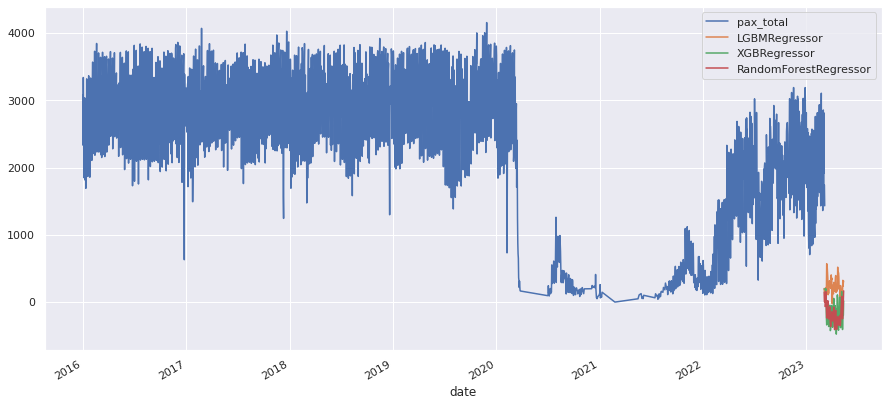

In [168]:
(pd.concat([generate_route_df(traffic_df, 'LGW', 'AMS').drop(columns=['paired_airport']),
            nixtla_model.predict(7*10)])
.set_index('date')
).plot(figsize=(15, 7));

In [170]:
draw_ts_multiple((pd.concat([generate_route_df(traffic_df, 'LGW', 'AMS').drop(columns=['paired_airport']),
                             nixtla_model.predict(7*10)])),
                 v1='pax_total', v2='LGBMRegressor');

In [173]:
crossvalidation_df = fcst.cross_validation(
    data=generate_route_df(traffic_df, "LGW", "AMS").drop(columns=['paired_airport']),
    window_size=90,
    n_windows=5,
    id_col='home_airport',
    time_col='date',
    target_col='pax_total'
)

/usr/local/lib/python3.9/dist-packages/mlforecast/forecast.py:548: UserWarning:

Excuting `cross_validation` after `fit` can produce unexpected errors



In [175]:
crossvalidation_df 

home_airport       date     cutoff  pax_total  LGBMRegressor  \
0            LGW 2021-12-15 2021-12-14      229.0     341.575880   
1            LGW 2021-12-16 2021-12-14      429.0     476.368344   
2            LGW 2021-12-17 2021-12-14      676.0     669.574856   
3            LGW 2021-12-18 2021-12-14      286.0     361.694776   
4            LGW 2021-12-19 2021-12-14      676.0     642.500495   
..           ...        ...        ...        ...            ...   
445          LGW 2023-03-05 2022-12-09     2815.0    2171.541196   
446          LGW 2023-03-06 2022-12-09     1916.0    2452.325358   
447          LGW 2023-03-07 2022-12-09     1741.0    1714.659201   
448          LGW 2023-03-08 2022-12-09     1432.0    1774.307321   
449          LGW 2023-03-09 2022-12-09     2029.0    1910.345551   

     XGBRegressor  RandomForestRegressor  
0      274.634827                 311.92  
1      373.423279                 493.71  
2      509.273682                 872.34  
3      481.385101                 955.41  
4      728.836487                1265.50  
..            ...                    ...  
445   1758.582520                1904.17  
446   2314.439209                1872.42  
447   1719.151611                1751.39  
448   1851.973633                1801.13  
449   2254.006348                1921.78  

[450 rows x 7 columns]

home_airport       date     cutoff  pax_total  LGBMRegressor  \
0            LGW 2021-12-15 2021-12-14      229.0     341.575880   
1            LGW 2021-12-16 2021-12-14      429.0     476.368344   
2            LGW 2021-12-17 2021-12-14      676.0     669.574856   
3            LGW 2021-12-18 2021-12-14      286.0     361.694776   
4            LGW 2021-12-19 2021-12-14      676.0     642.500495   
..           ...        ...        ...        ...            ...   
445          LGW 2023-03-05 2022-12-09     2815.0    2171.541196   
446          LGW 2023-03-06 2022-12-09     1916.0    2452.325358   
447          LGW 2023-03-07 2022-12-09     1741.0    1714.659201   
448          LGW 2023-03-08 2022-12-09     1432.0    1774.307321   
449          LGW 2023-03-09 2022-12-09     2029.0    1910.345551   

     XGBRegressor  RandomForestRegressor  
0      274.634827                 311.92  
1      373.423279                 493.71  
2      509.273682                 872.34  
3      481.385101                 955.41  
4      728.836487                1265.50  
..            ...                    ...  
445   1758.582520                1904.17  
446   2314.439209                1872.42  
447   1719.151611                1751.39  
448   1851.973633                1801.13  
449   2254.006348                1921.78  

[450 rows x 7 columns]

In [177]:
import numpy as np

def mse(y, y_hat):
  delta_y = np.square(y - y_hat)
  return np.nanmean(delta_y)

def rmse(y, y_hat):
  return np.sqrt(mse(y, y_hat))

cv_rmse = crossvalidation_df.groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['LGBMRegressor'])).mean()
print("RMSE using cross-validation: ", cv_rmse)

RMSE using cross-validation:  1273.27764493249


In [179]:
cv_rmse = crossvalidation_df.groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['LGBMRegressor'])).mean()
print("LGBM RMSE using cross-validation: ", cv_rmse)
cv_rmse = crossvalidation_df.groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['RandomForestRegressor'])).mean()
print("RandomForest RMSE using cross-validation: ", cv_rmse)
cv_rmse = crossvalidation_df.groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['XGBRegressor'])).mean()
print("XGBoost RMSE using cross-validation: ", cv_rmse)


cv_rmse = (crossvalidation_df
           .assign(Ensemble=lambda _df: _df[['LGBMRegressor', 'RandomForestRegressor', 'XGBRegressor']].mean(axis=1))
           .groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['Ensemble'])).mean())
print("Ensemble RMSE using cross-validation: ", cv_rmse)

LGBM RMSE using cross-validation:  1273.27764493249
RandomForest RMSE using cross-validation:  1129.583510504891
XGBoost RMSE using cross-validation:  1403.6654306362607
Ensemble RMSE using cross-validation:  1224.5424432661453


In [180]:
!pip install neuralforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 101.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 98.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 KB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 KB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [183]:
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS


In [184]:
horizon = 90
models = [NBEATS(input_size=2 * horizon, h=horizon, max_epochs=50),
          NHITS(input_size=2 * horizon, h=horizon, max_epochs=50)]

In [185]:
nforecast = NeuralForecast(models=models, freq='D')
nforecast.fit(df=generate_route_df(traffic_df, "LGW", "AMS").drop(columns=['paired_airport']).rename(columns={'home_airport': 'unique_id',
                                                                                                      'date': 'ds',
                                                                                                      'pax_total': 'y'}))

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

In [188]:
nforecast.predict().reset_index()

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

unique_id         ds       NBEATS        NHITS
0        LGW 2023-03-10  2310.547852  2104.245117
1        LGW 2023-03-11  1100.359985  1087.336548
2        LGW 2023-03-12  1911.781616  1971.682861
3        LGW 2023-03-13  2009.186768  2209.391602
4        LGW 2023-03-14  1681.576294  1472.562012
..       ...        ...          ...          ...
85       LGW 2023-06-03  1142.199585  1289.341919
86       LGW 2023-06-04  1955.284180  1927.884644
87       LGW 2023-06-05  2034.495361  2188.834473
88       LGW 2023-06-06  1595.225342  1472.211182
89       LGW 2023-06-07  1526.007446  1713.425903

[90 rows x 4 columns]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

<Axes: xlabel='ds'>

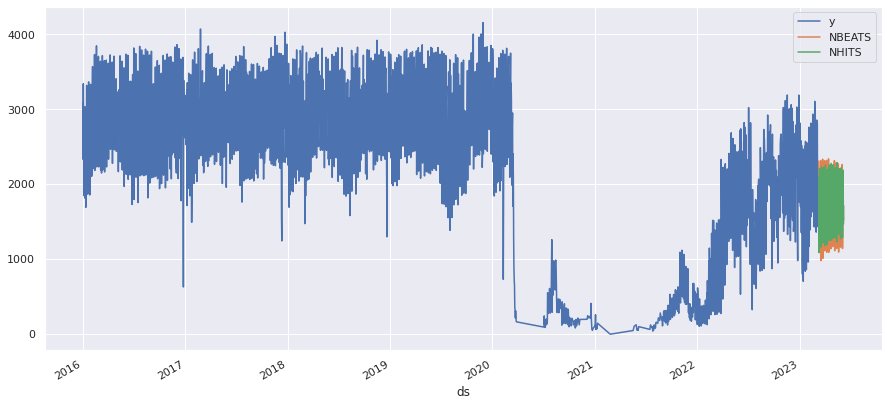

In [189]:
pd.concat(
    [
        generate_route_df(traffic_df, "LGW", "AMS").drop(columns=['paired_airport']).rename(columns={'home_airport': 'unique_id',
                                                                                                     'date': 'ds',
                                                                                                     'pax_total': 'y'}),
        nforecast.predict().reset_index()
    ]
).set_index('ds').plot(figsize=(15,7))